<h1>Test Data Creation
</h1>

In [3]:
import pandas as pd

data = {
    "Size": [1400, 1600, 1700, 1875, 1100, 1550, 2350, 2450, 1425, 1700],
    "Bedrooms": [3, 3, 3, 4, 2, 3, 4, 4, 2, 3],
    "Age": [20, 15, 18, 25, 10, 5, 30, 40, 15, 18],
    "Price": [245, 312, 279, 308, 199, 219, 405, 410, 230, 300]
}

df = pd.DataFrame(data)
print(df.head())  # Check if data is loading properly


   Size  Bedrooms  Age  Price
0  1400         3   20    245
1  1600         3   15    312
2  1700         3   18    279
3  1875         4   25    308
4  1100         2   10    199


<h1>Test Matrix Operations
</h1>

In [5]:
import numpy as np

X = df[["Size", "Bedrooms", "Age"]].values
Y = df[["Price"]].values

# Add bias term
X = np.c_[np.ones((X.shape[0], 1)), X]

print("Feature Matrix:\n", X[:5])  # Print first 5 rows
print("Target Variable:\n", Y[:5])  # Print first 5 target values



Feature Matrix:
 [[1.000e+00 1.400e+03 3.000e+00 2.000e+01]
 [1.000e+00 1.600e+03 3.000e+00 1.500e+01]
 [1.000e+00 1.700e+03 3.000e+00 1.800e+01]
 [1.000e+00 1.875e+03 4.000e+00 2.500e+01]
 [1.000e+00 1.100e+03 2.000e+00 1.000e+01]]
Target Variable:
 [[245]
 [312]
 [279]
 [308]
 [199]]


<h1>Check Normal Equation Calculation
</h1>

In [6]:
W = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
print("Optimal Weights:\n", W.flatten())



Optimal Weights:
 [34.20468466  0.13083313 -0.69545492  1.74859264]


<h1>Test Prediction Function
</h1>

In [7]:
def predict_house_price(size, bedrooms, age):
    new_data = np.array([[1, size, bedrooms, age]])
    predicted_price = new_data.dot(W)
    return predicted_price[0][0]

print(predict_house_price(1800, 3, 10))  # Test prediction


285.1038717920358


<h1>Check User Input
</h1>

In [9]:
size = float(input("Enter house size (sq ft): "))
bedrooms = int(input("Enter number of bedrooms: "))
age = int(input("Enter house age (years): "))

print(f"Predicted Price: ${predict_house_price(size, bedrooms, age):.2f}K")


Predicted Price: $278.15K


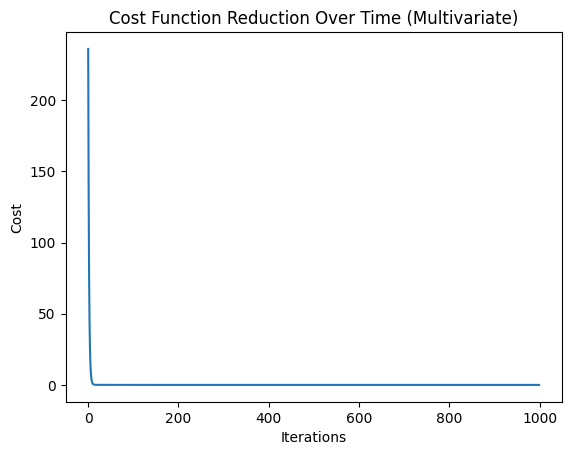

Final equation:
 + (3.74)*x1 + (3.17)*x2 + (2.82)*x3 + (1.38)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset from CSV
df = pd.read_csv("data.csv")  # CSV should have multiple feature columns and a "y" column
X = df.drop("y", axis=1).values  # Features (inputs), shape (n_samples, n_features)
y = df["y"].values  # Target (output), shape (n_samples,)
n = len(y)  # Number of data points

# Initialize parameters
w = np.zeros(X.shape[1])  # One weight per feature
b = 0
learning_rate = 0.01
epochs = 1000

# Cost function (Mean Squared Error)
def compute_cost(X, y, w, b):
    y_pred = X.dot(w) + b
    return np.mean((y_pred - y) ** 2) / 2

# Gradient Descent function
def gradient_descent(X, y, w, b, alpha, epochs):
    cost_history = []

    for _ in range(epochs):
        y_pred = X.dot(w) + b
        error = y_pred - y

        dw = X.T.dot(error) / n
        db = np.sum(error) / n

        # Update parameters
        w -= alpha * dw
        b -= alpha * db

        # Store cost for visualization
        cost_history.append(compute_cost(X, y, w, b))

    return w, b, cost_history

# Train model using gradient descent
w_final, b_final, cost_history = gradient_descent(X, y, w, b, learning_rate, epochs)

# Plot cost function over iterations
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Reduction Over Time (Multivariate)")
plt.show()

# Final equation of the line (printed form only, no plot)
print("Final equation:")
for i in range(len(w_final)):
    print(f" + ({w_final[i]:.2f})*x{i+1}", end="")
print(f" + ({b_final:.2f})")

